In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline


In [18]:
from sklearn import svm
from sklearn.datasets import make_blobs, make_classification

# Generate some random data for demonstration
X, y = make_blobs(n_samples=20, centers=2, random_state=6)

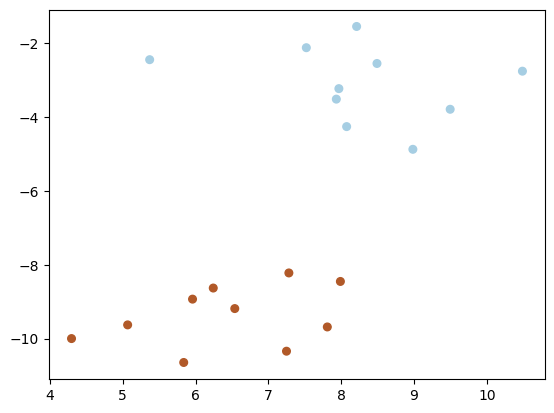

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

In [24]:
# Create an SVM model with an RBF kernel
model = svm.SVC(kernel='rbf', gamma=0.05)

# Fit the model to the data
model.fit(X, y)

# Access the alpha coefficients
alphas = np.abs(model.dual_coef_.ravel())  # Absolute values of dual coefficients


In [25]:
model.support_vectors_ 

array([[  8.07502382,  -4.25949569],
       [ 10.48848359,  -2.75858164],
       [  8.98426675,  -4.87449712],
       [  5.37042238,  -2.44715237],
       [  7.98907212,  -8.45336239],
       [  4.29743791, -10.00047495],
       [  7.28183008,  -8.2229685 ]])

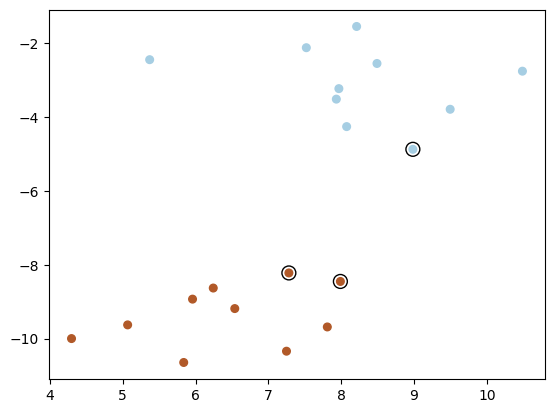

In [80]:
# Plot the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

In [81]:
model.support_vectors_.shape, model.support_vectors_

((3, 2),
 array([[ 8.98426675, -4.87449712],
        [ 7.98907212, -8.45336239],
        [ 7.28183008, -8.2229685 ]]))

In [82]:
model.dual_coef_.shape, model.dual_coef_

((1, 3), array([[-0.14522303,  0.11368673,  0.0315363 ]]))

In [83]:
w = np.dot(model.dual_coef_ * y[model.support_], model.support_vectors_)
print(w)

[[ 1.13789344 -1.2203571 ]]


In [84]:
# int
b = model.intercept_
print(b)

[-1.99921422]


ValueError: shapes (900,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

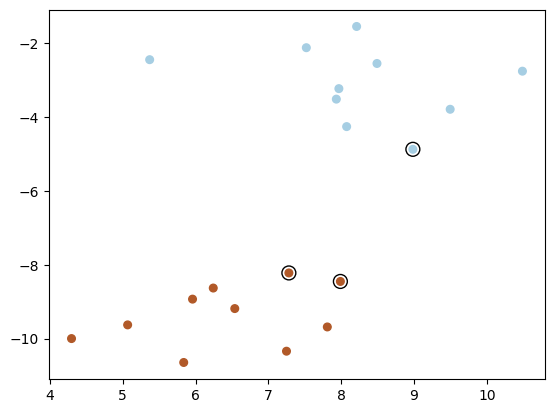

In [85]:
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = np.dot(xy, w) + b

# Plot decision boundary and margins
ax.contour(XX, YY, Z.reshape(XX.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary using dual_coef_')


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate some random data for demonstration
X, y = make_blobs(n_samples=20, centers=2, random_state=6)

def fit_svm_plot(kernel='linear', gamma=1.0):
    if kernel == 'linear':
        model = svm.SVC(kernel=kernel)
    else:
        model = svm.SVC(kernel=kernel, gamma=gamma)

    # Fit the model to the data
    model.fit(X, y)

    # Extract support vectors and dual coefficients
    support_vectors = model.support_vectors_
    dual_coefs = model.dual_coef_.ravel()

    # Calculate coefficients w
    w = np.dot(dual_coefs, support_vectors)

    # Calculate intercept b
    b = model.intercept_[0]

   
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)

    YY, XX = np.meshgrid(yy, xx)

    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = np.dot(xy, w) + b

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z.reshape(XX.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    print("w found using dual_coef_:", w)
    if kernel == 'linear':
        print("w found using coef_:", model.coef_)
    print("b found:", b)
    print("Support vectors:", support_vectors)
    print("Dual coefficients:", dual_coefs) 
    

w found using dual_coef_: [-0.16682897 -0.51246787]
w found using coef_: [[-0.16682897 -0.51246787]]
b found: -1.9992142247070375
Support vectors: [[ 8.98426675 -4.87449712]
 [ 7.98907212 -8.45336239]
 [ 7.28183008 -8.2229685 ]]
Dual coefficients: [-0.14522303  0.11368673  0.0315363 ]


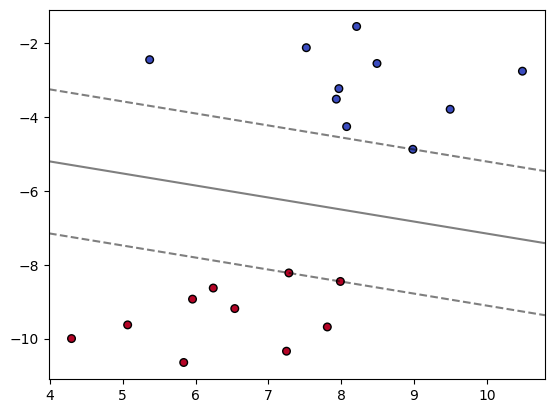

In [87]:
fit_svm_plot(kernel='linear')

In [90]:
X.shape

(20, 2)

In [88]:
model = svm.SVC(kernel='linear')
model.fit(X, y)

plot_contour(X, y, model)

IndexError: tuple index out of range

In [34]:
# calculate w
w = np.dot(model.dual_coef_, model.support_vectors_)
w

for i in range(len(model.support_vectors_)):
    print(np.dot(w, model.support_vectors_[i]) + b)

[26.57871177]
[8.01611047]
[30.87058547]
[13.97494895]
[66.82209149]
[88.05803336]
[65.85436853]


Let us now understand how the gamma parameter works. For that, we will look at a different dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

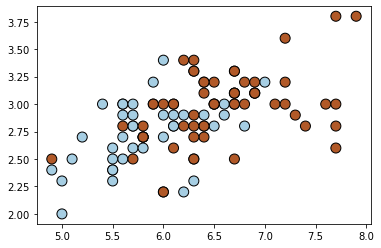

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)

In [4]:
from sklearn import svm

In [78]:
def plot_contour(clf, X, y):
    if X.shape[1] != 2:
        X = X.reshape(-1, 2)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

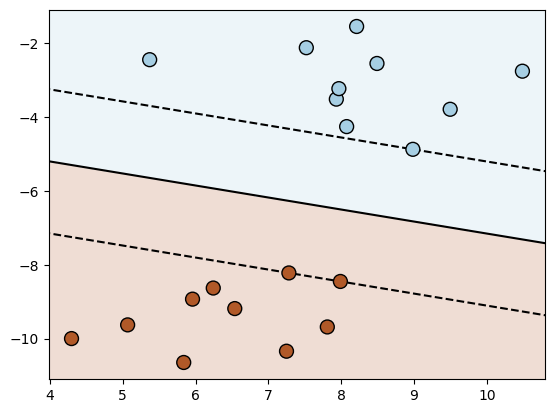

In [79]:
# Fit linear SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
plot_contour(clf, X, y)

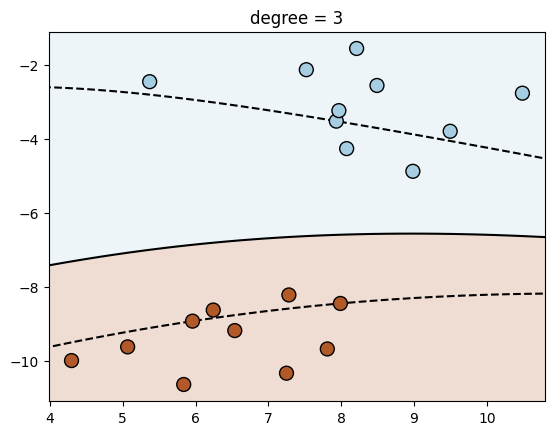

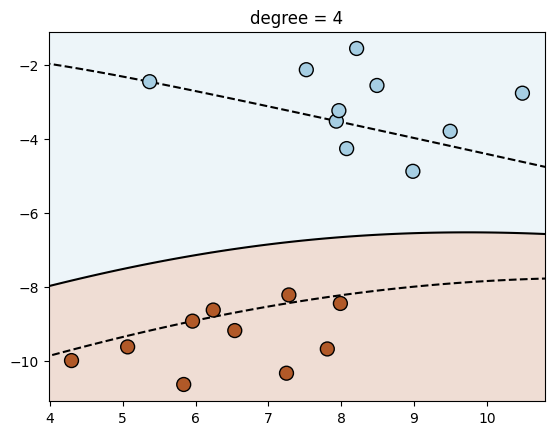

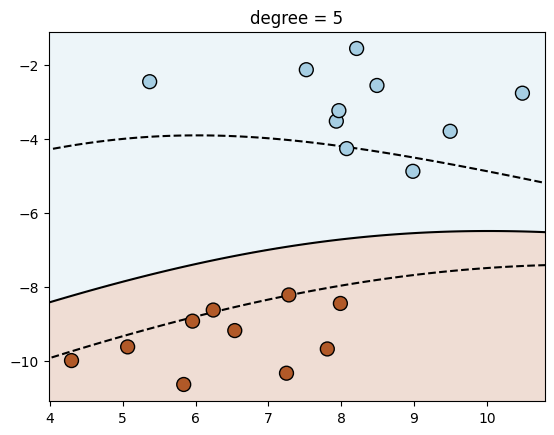

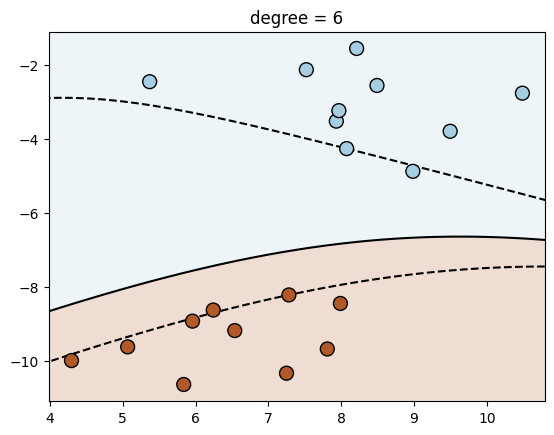

In [75]:
# Fit polynomial SVM of degree 2, 3, 4

for degree in range(3, 7):
    clf = svm.SVC(kernel='poly', degree=degree)
    clf.fit(X, y)
    plt.figure()
    plt.title('degree = {}'.format(degree))
    plot_contour(clf, X, y)

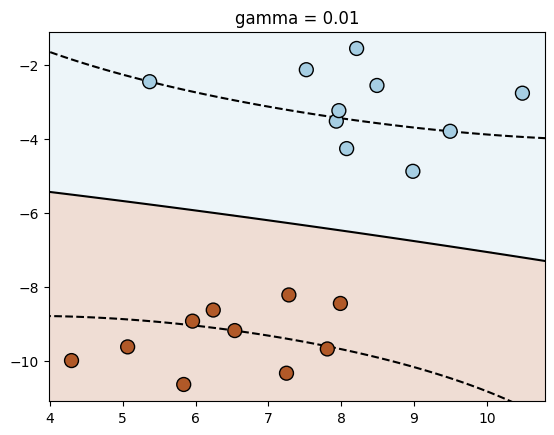

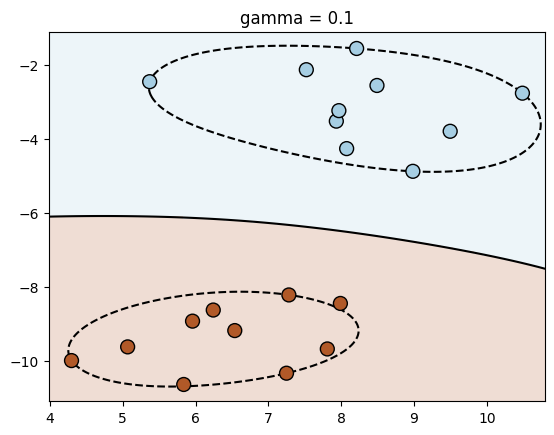

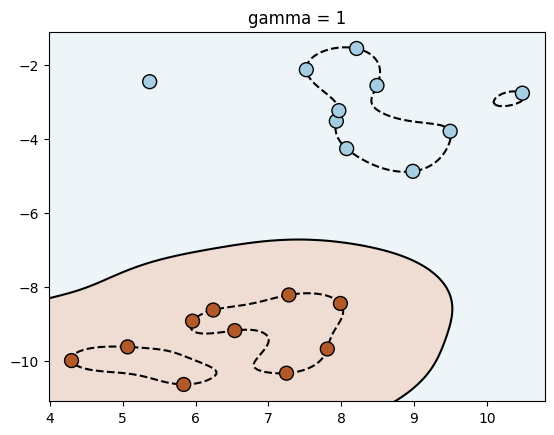

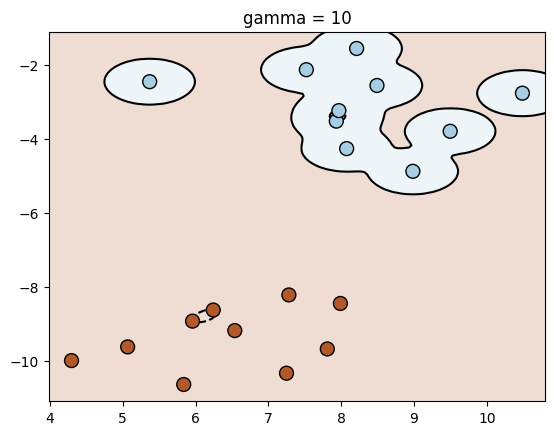

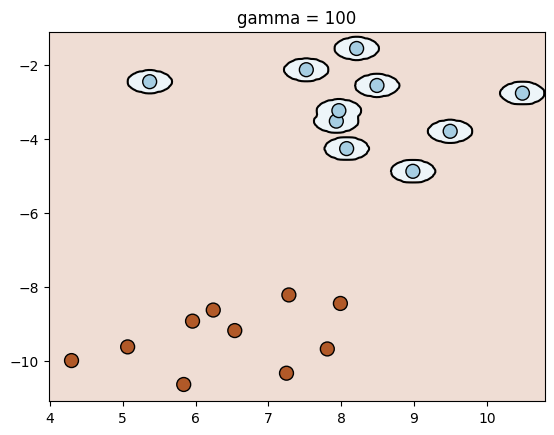

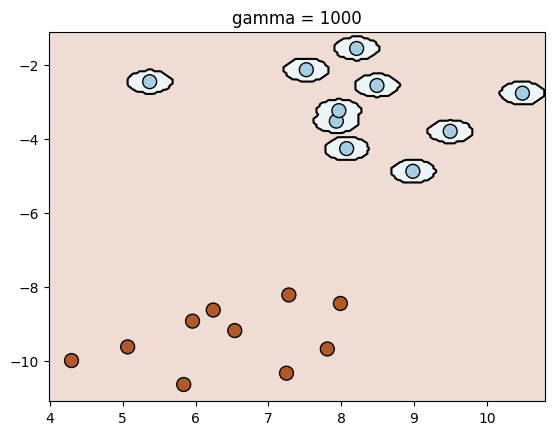

In [76]:
X_train = X
y_train = y
kernel = 'rbf'
# Store kernel matrix
kms = []
for fig_num, gamma in enumerate([0.01, 0.1, 1, 10, 100, 1000]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
 
    plt.title("gamma = {}".format(gamma))
    plot_contour(clf, X_train, y_train)

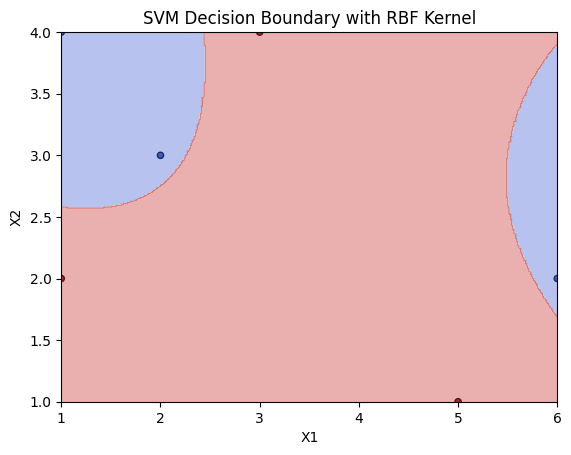

In [91]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt

# Sample data (2 features)
X = np.array([[1, 2], [3, 4], [5, 1], [6, 2], [1, 4], [2, 3]])
y = np.array([1, 1, 1, -1, -1, -1])

# Create RBF SVM classifier
clf = svm.SVC(kernel="rbf")
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 400),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 400))

# Predict labels for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape = xx.shape

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()

In [99]:
from IPython.display import display
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider

# Generate a dataset with blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.0)

def plot_svm(gamma):
    # Create RBF SVM classifier with adjustable gamma
    clf = svm.SVC(kernel="rbf", gamma=gamma)
    clf.fit(X, y)

    # Create a mesh for plotting
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    # Predict labels for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z.shape = xx.shape

    # Plot decision boundary and data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('SVM Decision Boundary with RBF Kernel (gamma={})'.format(gamma))
    plt.show()

# Create interactive slider
gamma_slider = FloatSlider(min=0.05, max=20, value=1, description="Gamma")
display(interact(plot_svm, gamma=gamma_slider))


interactive(children=(FloatSlider(value=1.0, description='Gamma', max=20.0, min=0.05), Output()), _dom_classes…

<function __main__.plot_svm(gamma)>